In [1]:
import nltk
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens
['At', 'eight', "o'clock", 'on', 'Thursday', 'morning',
'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']
tagged = nltk.pos_tag(tokens)
tagged[0:6]
[('At', 'IN'), ('eight', 'CD'), ("o'clock", 'JJ'), ('on', 'IN'),
('Thursday', 'NNP'), ('morning', 'NN')]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'JJ'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [2]:
entities = nltk.chunk.ne_chunk(tagged)

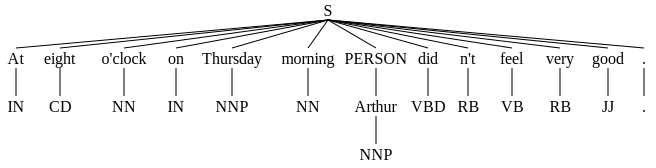

In [3]:
entities

In [5]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank 
t=treebank.parsed_sents('wsj_0001.mrg')[0] 
t.draw()

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\sopan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


In [ ]:
# https://www.nltk.org/howto.html
# https://huggingface.co/Helsinki-NLP/opus-mt-bn-en/tree/main

In [10]:
import sklearn
print(sklearn.__version__)

1.8.0


In [11]:
import nltk
from transformers import MarianMTModel, MarianTokenizer

In [17]:
import nltk
import torch
import re
from transformers import MarianMTModel, MarianTokenizer

In [18]:
# 1. Setup
MODEL_NAME = "Helsinki-NLP/opus-mt-bn-en"
tokenizer = MarianTokenizer.from_pretrained(MODEL_NAME)
model = MarianMTModel.from_pretrained(MODEL_NAME)
device = torch.device("cpu")
model.to(device)
model.eval()

MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(63597, 512, padding_idx=63596)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(63597, 512, padding_idx=63596)
      (embed_positions): MarianSinusoidalPositionalEmbedding(512, 512)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (activation_fn): SiLU()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
          (final_layer_norm): LayerNorm((512,), eps=1e-05

In [19]:
# 2. Refined Preprocessing (Keeps punctuation for sentence splitting)
def preprocess_text(text):
    sentences = nltk.sent_tokenize(text)
    cleaned = [re.sub(r"[^\u0980-\u09FF\s।]", "", s).strip() for s in sentences if s.strip()]
    return cleaned

In [20]:
# 3. Translation logic
def translate_bangla_to_english(text):
    sentences = preprocess_text(text)
    translations = []
    with torch.no_grad():
        for sent in sentences:
            inputs = tokenizer(sent, return_tensors="pt", padding=True).to(device)
            generated_tokens = model.generate(**inputs)
            translations.append(tokenizer.decode(generated_tokens[0], skip_special_tokens=True))
    return " ".join(translations)

In [21]:
bangla_text='''আনন্দবাজার পত্রিকা যাত্রা শুরু করেছিল ১৩ মার্চ, ১৯২২ (২৯ শে ফাল্গুন, ১৩২৮ বঙ্গাব্দ)। আনন্দবাজার পত্রিকার আত্মপ্রকাশ ঘটেছিল দোলযাত্রার দিন সান্ধ্য দৈনিক হিসাবে। মূল্য ছিল দু’পয়সা। ছাপা হত ১৯১৪ সালে সুরেশচন্দ্র মজুমদার প্রতিষ্ঠিত ৭১/১,মির্জাপুর স্ট্রিটের শ্রীগৌরাঙ্গ প্রেস হতে।[৬] প্রথম সংখ্যাটি ছাপা হয়েছিল পুরোপুরি লাল কালিতে। যাকে ব্রিটিশ সরকারের মুখপাত্র ইংলিশম্যান এক 'বিপদ সংকেত' বলে ভেবেছিল। ইংলিশম্যানের এই দূরদৃষ্টির প্রশংসা না-করে উপায় নেই। কেননা, আনন্দবাজার পত্রিকা দেশের স্বাধীনতা অর্জনের লক্ষ্যে নির্ভীক ও আপোসহীন মনোভাব নিয়ে ব্রিটিশ সাম্রাজ্যের ভিতে কাঁপন ধরিয়ে দিয়েছিল।[৭] ১৯২৩ খ্রিস্টাব্দের ১ জুন হতে এর প্রকাশনা সকালে হতে থাকে।

প্রাক্-স্বাধীনতা যুগে আনন্দবাজার পত্রিকা ছিল জাতীয়তাবাদের উদ্গাতা, স্বাধীনতা পরবর্তী কালে সে দাঁড়িয়েছে এই বাংলা ও তার মানুষদের সার্বিক উন্নয়নের পক্ষে। পক্ষপাতহীন মতামত, গঠনমূলক সমালোচনা, অদম্য সাহস ও আপসহীন মনোভাব এ হল মাত্র কয়েকটা দিক, যা আনন্দবাজার পত্রিকাকে করে তুলেছে 'বাঙলার মুখপাত্র'।

১৯৫৪ খ্রিস্টাব্দে প্রেস কমিশন আনন্দবাজার পত্রিকাকে দেশের একক সংস্করণের সর্বাধিক প্রচারিত সংবাদপত্র হিসাবে ঘোষণা করে।'''

In [22]:
# 4. Run
print("English:", translate_bangla_to_english(bangla_text))

English: Anandbazar magazine was launched on March 13th, 1828 by Anandba’s newspaper, Anandbazar, which appeared as a evening-long daily event, was a value that was published in 1914 as a symbol of the 711thzur Street press in Sregorpur, which was first printed in red, the British government's spokesman, who thought the English government had no idea of the danger as a way of praising the country's independence and lack of independence.


In [16]:
# 4. Run
bangla_text = "আমি বাংলায় লিখছি। প্রাকৃতিক ভাষা প্রক্রিয়াকরণ শক্তিশালী।"
print("English:", translate_bangla_to_english(bangla_text))

model.safetensors:   0%|          | 0.00/309M [00:00<?, ?B/s]

English: I'm writing in English, and the process of natural language is powerful.
